ML automatisch aktualisiert | Typ='B' | Anomalien: 1775


,x_ist,x_soll,ODA_x,deviation,abweichung,anomaly_iforest
datetime,,,,,,
2022-11-29 12:00:00,4.371218,10.0,4.358199,-5.628782,-5.628782,0
2022-11-29 12:15:00,4.372252,10.0,4.335261,-5.627748,-5.627748,0
2022-11-29 12:30:00,4.378433,10.0,4.311610,-5.621567,-5.621567,0
2022-11-29 12:45:00,4.379833,10.0,4.332396,-5.620167,-5.620167,0
2022-11-29 13:00:00,4.384516,10.0,4.345254,-5.615484,-5.615484,0
...,...,...,...,...,...,...
2025-07-04 06:30:00,7.616642,10.0,8.631339,-2.383358,-2.383358,0
2025-07-04 06:45:00,7.632800,10.0,8.727860,-2.367200,-2.367200,0
2025-07-04 07:00:00,7.612166,10.0,8.796650,-2.387834,-2.387834,0


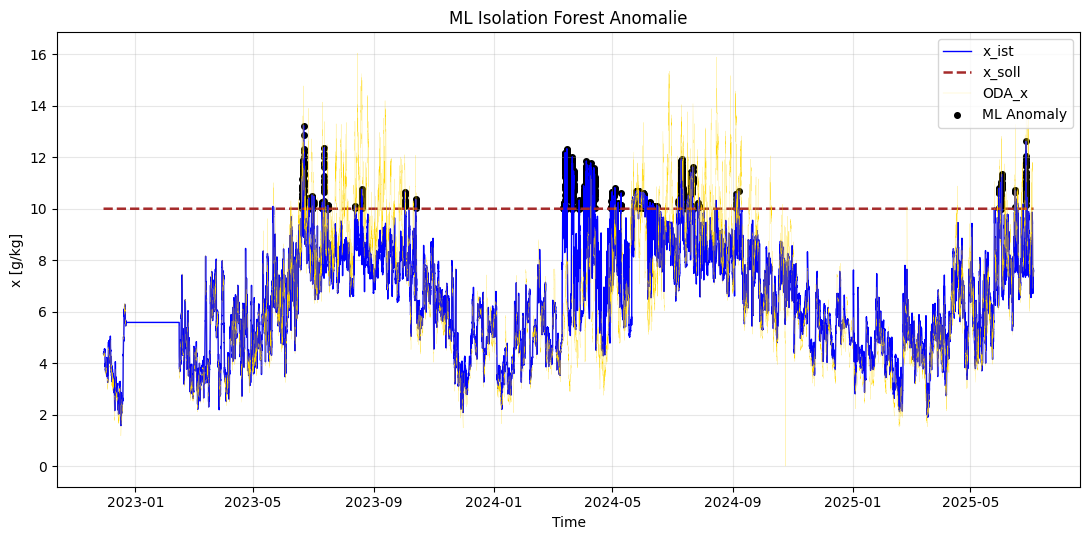

ML Observer


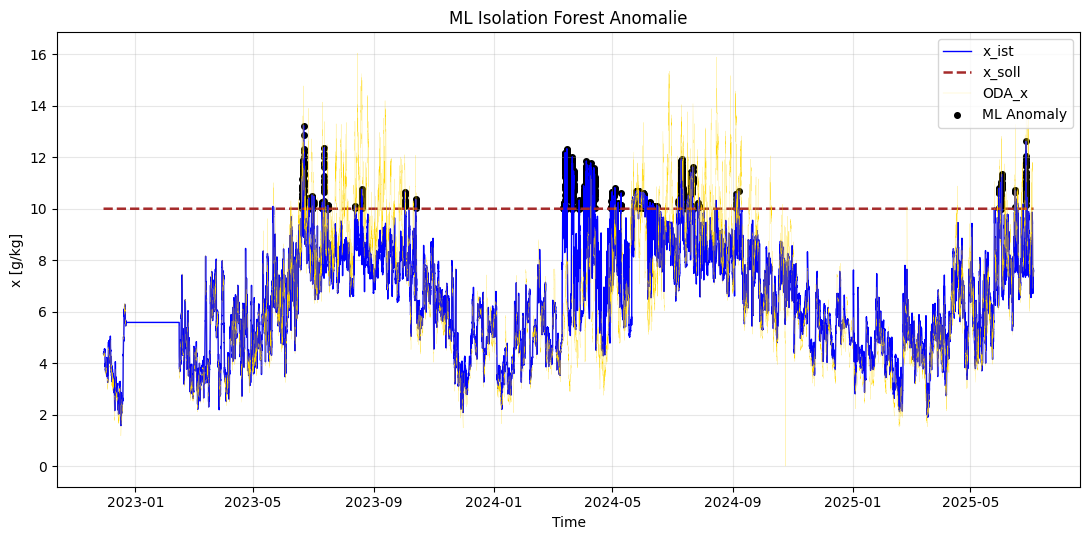

 mem['vis'] aktualisiert


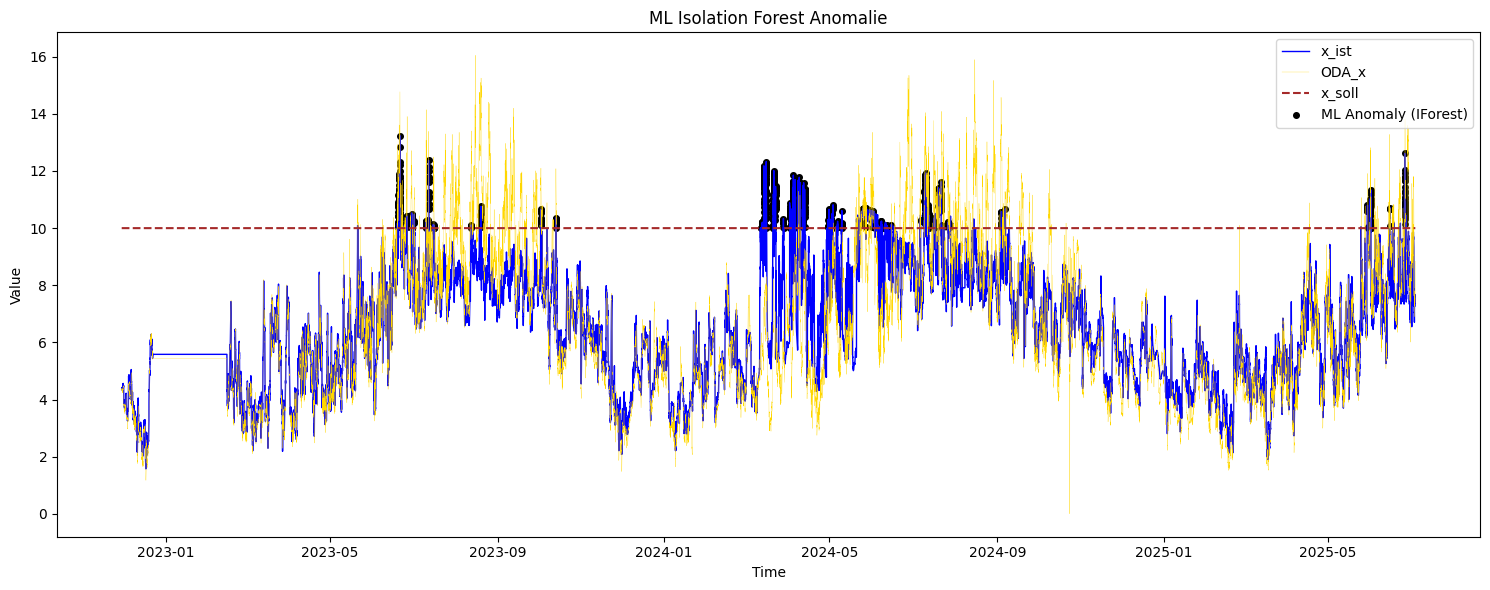

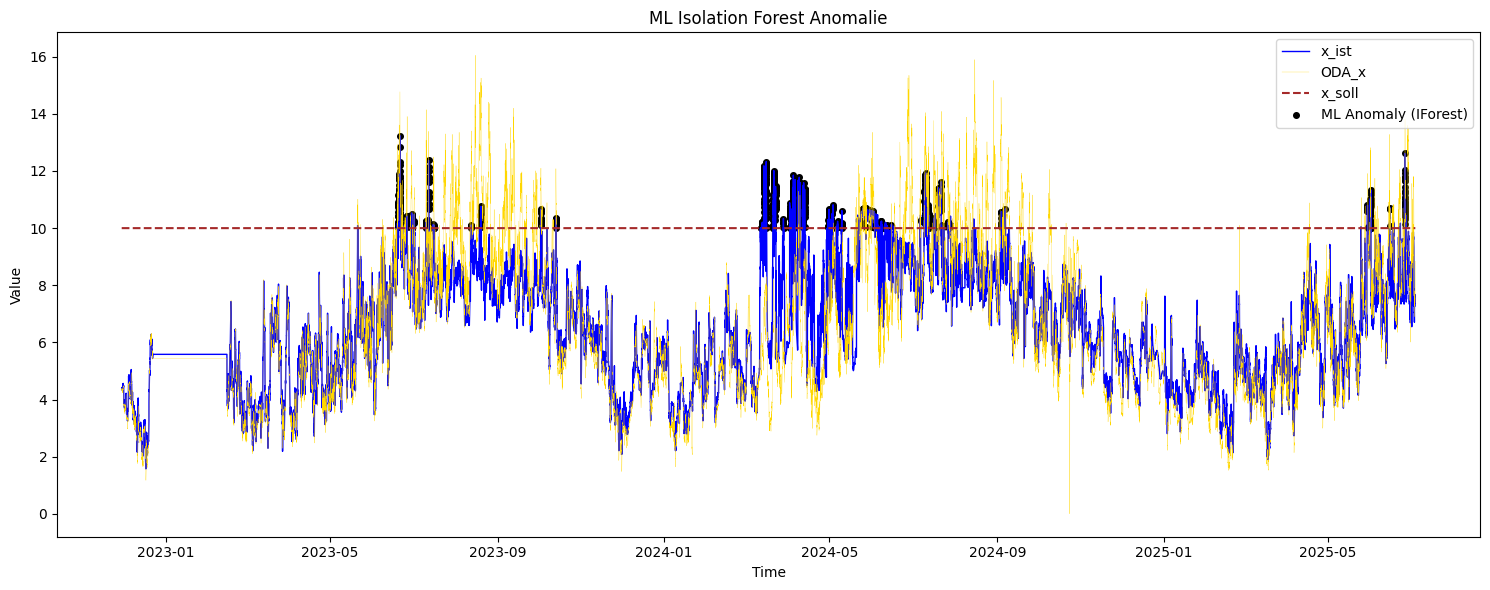

In [ ]:
import matplotlib.pyplot as plt

plt.close('all')            
RUN_AS_LIBRARY = True      
%run ./input_module/excel_adapter.ipynb
%run ./processing_module/feature_engineering.ipynb
%run ./output_module/output_observer.ipynb


# === Pfad zur Excel-Datei ===
file_path = r"C:\Users\Dell\Desktop\ml_modular_system\input_module\data.xlsx"

# === Input  ===

df_clean = load_and_clean_data(file_path)

# ===  processing ===

df_processed = process_data(df_clean)

# === Output ===

plot_results(df_processed)

In [ ]:


_load_and_clean = globals().get("load_and_clean_data")     # aus Zelle 1
_process_data   = globals().get("process_data")            # aus Zelle 1
_render_main    = globals().get("main")                    # aus Zelle 1

def main(file_path=None, title="ML Isolation Forest Anomalie"):
    if not callable(_load_and_clean):
        raise RuntimeError("load_and_clean_data ist nicht vorhanden (Zelle 1).")
    if not callable(_process_data):
        raise RuntimeError("process_data ist nicht vorhanden (Zelle 2).")
    if not callable(_render_main):
        raise RuntimeError("Die main-Funktion für die Darstellung ist nicht vorhanden (Zelle 3).")

    # 1) Laden/Bereinigen
    df_clean_or_none = _load_and_clean(file_path)

    # 2) Verarbeitung/ML
    _ = _process_data(df_clean_or_none) if df_clean_or_none is not None else _process_data()

    # 3) Zeichnen
    _render_main(title)
